In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns 

In [2]:
dt = pd.read_csv('/Users/sky-walker/Downloads/module7_assignment_dataset.csv')
dt

,id,flight,departure_time,stops,arrival_time,duration,departure_region,destination_region,class,airline,price
0,0,SG-8709,Evening,zero,Night,1.98,Europe,Europe,Ecomomy,Qatar Airline,3242.03
1,1,SG-8157,Early_Morning,zero,Morning,8.06,Africa,South America,Ecomomy,Delta Airlines,5209.48
2,2,I5-764,Early_Morning,zero,Early_Morning,4.24,Europe,Europe,Ecomomy,Turkish Airlines,1543.05
3,3,UK-995,Morning,zero,Afternoon,7.43,North America,Europe,Ecomomy,Delta Airlines,6970.84
4,4,UK-963,Morning,zero,Morning,7.62,Middle East,North America,Ecomomy,United Airlines,2211.37
...,...,...,...,...,...,...,...,...,...,...,...
49995,49995,UK-877,Morning,one,Afternoon,2.99,North America,Europe,Ecomomy,Emirates airline,5956.35
49996,49996,UK-873,Early_Morning,one,Afternoon,7.88,South America,North America,Ecomomy,Delta Airlines,8225.94
49997,49997,UK-873,Early_Morning,one,Afternoon,4.90,North America,Africa,Business,American Airlines,551.43
49998,49998,UK-875,Evening,one,Night,2.09,Europe,Europe,Ecomomy,Emirates airline,2938.49


# log transformation of price 


Text(0.5, 1.0, 'log Price of flight')

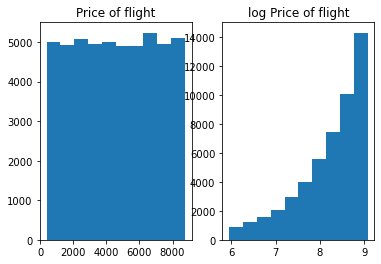

In [3]:
#Complete log transformations for the price column
f, ax = plt.subplots(1, 2)

ax[0].hist(dt.price)
ax[0].set_title('Price of flight')
ax[1].hist(np.log(dt.price))
ax[1].set_title('log Price of flight')

In [4]:
#values count departure_time, class, and airlines.
dt['departure_time'].value_counts()

Evening          12649
Morning          11415
Early_Morning    10734
Afternoon         9067
Night             5685
Late_Night         450
Name: departure_time, dtype: int64

In [5]:
dt['class'].value_counts()

Ecomomy     41671
Business     6287
First        2042
Name: class, dtype: int64

In [6]:
dt['airline'].value_counts()

Delta Airlines       12560
United Airlines       9952
Qatar Airline         7584
American Airlines     7334
Turkish Airlines      5066
Emirates airline      4919
British Airways       2585
Name: airline, dtype: int64

In [7]:
#dummy coding for any categorical data that needs to be completed.
final_data = pd.get_dummies(dt, columns = ['class', 'destination_region',
                                            'arrival_time', 'airline', 'departure_time', 'stops', 'flight',
                                          'departure_region'], drop_first=True )
final_data.info()
final_data.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Columns: 678 entries, id to departure_region_South East Asia
dtypes: float64(2), int64(1), uint8(675)
memory usage: 33.3 MB


,id,duration,price,class_Ecomomy,class_First,destination_region_East Asia,destination_region_Europe,destination_region_Middle East,destination_region_North America,destination_region_South America,...,flight_UK-993,flight_UK-994,flight_UK-995,flight_UK-996,departure_region_East Asia,departure_region_Europe,departure_region_Middle East,departure_region_North America,departure_region_South America,departure_region_South East Asia
0,0,1.98,3242.03,1,0,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1,1,8.06,5209.48,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,2,4.24,1543.05,1,0,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
3,3,7.43,6970.84,1,0,0,1,0,0,0,...,0,0,1,0,0,0,0,1,0,0
4,4,7.62,2211.37,1,0,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0


# Pca 

In [8]:
#Complete Principal Component Analysis on the dataset.
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(final_data)
scaled_data = scaler.transform(final_data)

In [9]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(scaled_data)

PCA(n_components=2)

In [10]:
x_pca = pca.transform(scaled_data)

In [11]:
scaled_data.shape

(50000, 678)

In [12]:
x_pca.shape

(50000, 2)

Text(0, 0.5, '#2 Principal Component')

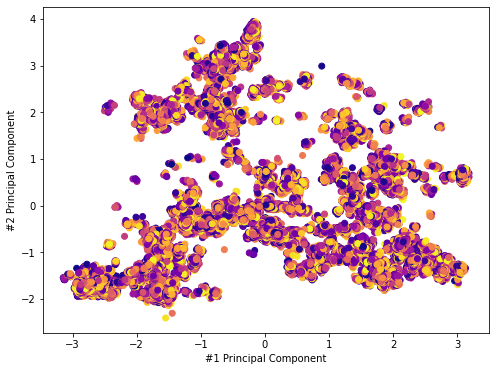

In [13]:
plt.figure(figsize=(8,6))
plt.scatter(x_pca[:,0],x_pca[:,1],c=final_data['price'],cmap='plasma')
plt.xlabel('#1 Principal Component')
plt.ylabel('#2 Principal Component')

In [14]:
pca.components_

array([[-0.00523442, -0.00512041,  0.00553111, ..., -0.00037181,
         0.00317791,  0.00571999],
       [ 0.03372525, -0.00038974, -0.00236206, ..., -0.00171911,
        -0.00129971,  0.00782312]])

<AxesSubplot:>

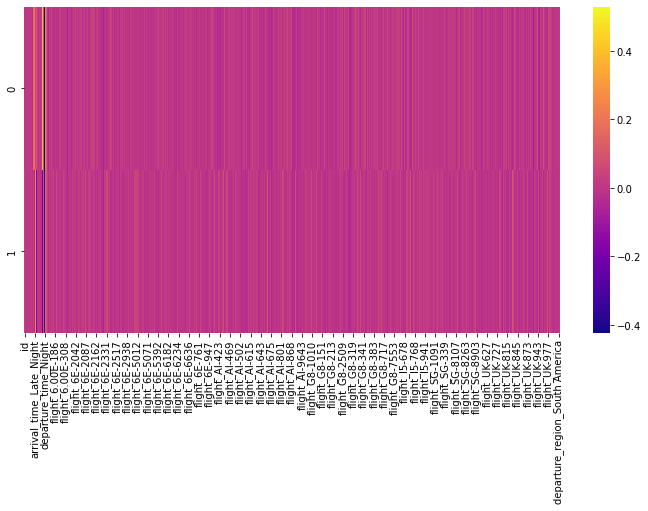

In [15]:
dt_comp = pd.DataFrame(pca.components_,columns=final_data.columns)
plt.figure(figsize=(12,6))
sns.heatmap(dt_comp,cmap='plasma')